**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Handling**

In [ ]:
import pandas as pd

csv_file_path = '/content/drive/MyDrive/cleaned_labels.csv'

df = pd.read_csv(csv_file_path)

total_rows = len(df)

print(f"Total number of items (rows) in '{csv_file_path}': {total_rows}")


Total number of items (rows) in '/content/drive/MyDrive/cleaned_labels.csv': 8408


In [ ]:
import pandas as pd

csv_files = [
    '/content/drive/MyDrive/cutmixed_images/labelsX.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsY.csv',
    '/content/drive/MyDrive/cutmixed_images/labelsZ.csv',
   '/content/drive/MyDrive/cleaned_labels.csv'
]

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)

    if 'image' in df.columns and 'level' in df.columns:
        df = df.rename(columns={'image': 'filename', 'level': 'label'})
    elif 'filename' in df.columns and 'labels' in df.columns:
        df = df.rename(columns={'labels': 'label'})

    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)
merged_df.to_csv('/content/drive/MyDrive/merged_labels.csv', index=False)

print("CSV files standardized and merged successfully.")


CSV files standardized and merged successfully.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


In [ ]:
class_counts = merged_df['label'].value_counts()

print("Number of unique classes:", len(class_counts))
print("\nClass distribution:\n", class_counts)

Number of unique classes: 5

Class distribution:
 label
0    6150
2    1283
4     800
3     800
1     800
Name: count, dtype: int64


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/merged_labels.csv')
print(data.value_counts().sum())
print(data['label'].unique())
print(data['label'].value_counts().unique())
data.head()

9833
[4 3 1 0 2]
[6150 1283  800]


,filename,label
0,cutmixed_4_0.jpeg,4
1,cutmixed_4_1.jpeg,4
2,cutmixed_4_2.jpeg,4
3,cutmixed_4_3.jpeg,4
4,cutmixed_4_4.jpeg,4


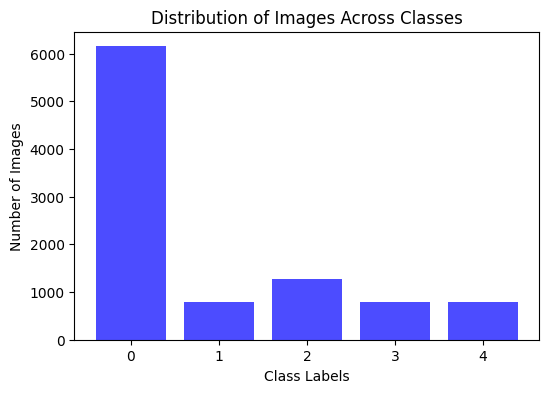

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


class_counts = data['label'].value_counts().sort_index()  # Get counts and sort by class labels


plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color='blue', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Distribution of Images Across Classes')


plt.xticks(class_counts.index)

plt.show()


In [ ]:
print("Number of images in each class:")
for level, count in class_counts.items():
    print(f"Class {level}: {count} images")

Number of images in each class:
Class 0: 6150 images
Class 1: 800 images
Class 2: 1283 images
Class 3: 800 images
Class 4: 800 images


Class distribution after undersampling: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}
Resampled class counts: {0: 800, 1: 800, 2: 800, 3: 800, 4: 800}


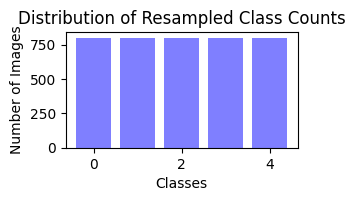

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

X = data['filename']
y = data['label']

X_array = X.values.reshape(-1, 1)
y_array = y.values

class_counts = {0: 6150, 1: 800, 2: 1283, 3: 800, 4: 800}
target_count = min(class_counts.values())

undersampler = RandomUnderSampler(sampling_strategy={label: target_count for label in class_counts.keys()})
X_under, y_under = undersampler.fit_resample(X_array, y_array)

print("Class distribution after undersampling:", dict(zip(*np.unique(y_under, return_counts=True))))

oversampler = RandomOverSampler(sampling_strategy={label: target_count for label in np.unique(y_under)})
X_resampled, y_resampled = oversampler.fit_resample(X_under, y_under)

unique, counts = np.unique(y_resampled, return_counts=True)
resampled_class_counts = dict(zip(unique, counts))
print("Resampled class counts:", resampled_class_counts)

plt.figure(figsize=(3, 1.5))
plt.bar(resampled_class_counts.keys(), resampled_class_counts.values(), color='blue', alpha=0.5)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Resampled Class Counts')
plt.show()


In [ ]:
new_X = []
for i in X_resampled:
  for j in i:
    new_X.append(j)

In [ ]:
y_resampled

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
resampled_data = {'filename': new_X,
        'label': y_resampled}

balanced_data = pd.DataFrame(resampled_data)


balanced_data.sample(10)

,filename,label
2365,11983_right,2
3544,cutmixed_4_495.jpeg,4
1197,cutmixed_41.jpeg,1
1969,1540_left,2
2271,17669_left,2
15,13765_right,0
3930,cutmixed_4_45.jpeg,4
628,14984_left,0
3860,11854_right,4
475,1212_left,0


In [ ]:
print(balanced_data.value_counts().sum())
print(balanced_data['label'].unique())
print(balanced_data['label'].value_counts().unique())

4000
[0 1 2 3 4]
[800]


In [ ]:
balanced_data['filename'] = balanced_data['filename']+'.jpeg'
balanced_data['label'] = balanced_data['label'].astype(str)
balanced_data.head()

,filename,label
0,13754_right.jpeg,0
1,10295_left.jpeg,0
2,11612_right.jpeg,0
3,14262_left.jpeg,0
4,13475_right.jpeg,0


In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 5

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(balanced_data, test_size=0.2, random_state=42)

**Ben Graham's Preprocessing**

In [ ]:
import cv2
import numpy as np
import os

def scale_radius(img, scale):
    """
    Scales the image to a specified radius.
    """
    x = img[img.shape[0] // 2, :, :].sum(1)
    r = (x > x.mean() / 10).sum() / 2
    s = scale * 1.0 / r
    return cv2.resize(img, (0, 0), fx=s, fy=s)

def subtract_local_average_color(img):
    """
    Subtracts the local average color.
    """
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0),  10), -4, 128)
    return img

def clip_image(img, target_size=(224, 224)):
    """
    Clips the image to 90% size to remove boundary effects, and optionally applies resizing and normalization.
    """
    img_a = scale_radius(img, 300)
    img = subtract_local_average_color(img_a)
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    center = (img.shape[1] // 2, img.shape[0] // 2)
    radius = int(300 * 0.9)
    cv2.circle(mask, center, radius, 255, -1)
    img_masked = cv2.bitwise_and(img,img, mask=mask)

    # # Resize the image
    img_resized = cv2.resize(img_masked, target_size)


    return img_resized


In [ ]:
import os
import pandas as pd

cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

print("Total cutmixed_ images in train:", len(cutmixed_train))
print("Total cutmixed_ images in val:", len(cutmixed_val))

cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))

missing_train_files = cutmixed_train[~cutmixed_train['exists']]
missing_val_files = cutmixed_val[~cutmixed_val['exists']]

print("Missing train files:", missing_train_files['filename'].tolist())
print("Missing val files:", missing_val_files['filename'].tolist())

Total cutmixed_ images in train: 1149
Total cutmixed_ images in val: 276
Missing train files: ['cutmixed_4_467.jpeg.jpeg', 'cutmixed_19.jpeg.jpeg', 'cutmixed_4_425.jpeg.jpeg', 'cutmixed_class3_47.jpeg.jpeg', 'cutmixed_92.jpeg.jpeg', 'cutmixed_4_232.jpeg.jpeg', 'cutmixed_class3_140.jpeg.jpeg', 'cutmixed_4_290.jpeg.jpeg', 'cutmixed_4_578.jpeg.jpeg', 'cutmixed_4_158.jpeg.jpeg', 'cutmixed_class3_544.jpeg.jpeg', 'cutmixed_class3_76.jpeg.jpeg', 'cutmixed_4_518.jpeg.jpeg', 'cutmixed_4_0.jpeg.jpeg', 'cutmixed_4_36.jpeg.jpeg', 'cutmixed_181.jpeg.jpeg', 'cutmixed_4_345.jpeg.jpeg', 'cutmixed_4_443.jpeg.jpeg', 'cutmixed_4_342.jpeg.jpeg', 'cutmixed_4_494.jpeg.jpeg', 'cutmixed_class3_371.jpeg.jpeg', 'cutmixed_class3_514.jpeg.jpeg', 'cutmixed_class3_368.jpeg.jpeg', 'cutmixed_4_368.jpeg.jpeg', 'cutmixed_class3_305.jpeg.jpeg', 'cutmixed_class3_112.jpeg.jpeg', 'cutmixed_4_228.jpeg.jpeg', 'cutmixed_class3_84.jpeg.jpeg', 'cutmixed_class3_183.jpeg.jpeg', 'cutmixed_4_591.jpeg.jpeg', 'cutmixed_4_248.jpeg.jpe

<ipython-input-25-77bcb2fc647d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['exists'] = cutmixed_train['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))
<ipython-input-25-77bcb2fc647d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['exists'] = cutmixed_val['filename'].apply(lambda x: os.path.exists(os.path.join('/content/drive/MyDrive/train_dr', x)))


In [ ]:
cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


<ipython-input-26-6262e7331acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_train['filename'] = cutmixed_train['filename'].apply(lambda x: os.path.basename(x))
<ipython-input-26-6262e7331acc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutmixed_val['filename'] = cutmixed_val['filename'].apply(lambda x: os.path.basename(x))


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

def check_filenames(df, directory):
    missing_files = [f for f in df['filename'] if not os.path.exists(os.path.join(directory, f))]
    if missing_files:
        print(f"Missing files: {len(missing_files)}")
        print("Sample missing files:", missing_files[:5])
    return len(missing_files) == 0

image_directory = '/content/drive/MyDrive/train_dr'

if not check_filenames(train, image_directory) or not check_filenames(val, image_directory):
    print("Some image files are missing. Please verify the paths and filenames.")
else:
    print("All files are present.")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Missing files: 1149
Sample missing files: ['cutmixed_4_467.jpeg.jpeg', 'cutmixed_19.jpeg.jpeg', 'cutmixed_4_425.jpeg.jpeg', 'cutmixed_class3_47.jpeg.jpeg', 'cutmixed_92.jpeg.jpeg']
Some image files are missing. Please verify the paths and filenames.
Found 2051 validated image filenames belonging to 5 classes.
Found 524 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1149 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 276 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
# Correct filenames by removing extra extensions
train['filename'] = train['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))
val['filename'] = val['filename'].apply(lambda x: x.replace('.jpeg.jpeg', '.jpeg'))

# Re-check if files exist after correcting filenames
print("Checking corrected filenames...")
missing_train_files = [f for f in train['filename'] if not os.path.exists(os.path.join(image_directory, f))]
missing_val_files = [f for f in val['filename'] if not os.path.exists(os.path.join(image_directory, f))]

print(f"Missing files in train after correction: {len(missing_train_files)}")
print(f"Missing files in val after correction: {len(missing_val_files)}")

if missing_train_files:
    print("Sample missing train files:", missing_train_files[:5])
if missing_val_files:
    print("Sample missing val files:", missing_val_files[:5])


Checking corrected filenames...
Missing files in train after correction: 0
Missing files in val after correction: 0


In [ ]:
# Filter cutmixed_ images
cutmixed_train = train[train['filename'].str.startswith('cutmixed_')]
cutmixed_val = val[val['filename'].str.startswith('cutmixed_')]

# Print counts to verify
print(f"Total cutmixed_ images in train: {len(cutmixed_train)}")
print(f"Total cutmixed_ images in val: {len(cutmixed_val)}")

# Combine the filtered cutmixed_ images with the original DataFrames
train_combined = pd.concat([train, cutmixed_train]).drop_duplicates(subset='filename')
val_combined = pd.concat([val, cutmixed_val]).drop_duplicates(subset='filename')

# Print counts to verify combined DataFrames
print(f"Total images in combined train DataFrame: {len(train_combined)}")
print(f"Total images in combined val DataFrame: {len(val_combined)}")

Total cutmixed_ images in train: 1149
Total cutmixed_ images in val: 276
Total images in combined train DataFrame: 3200
Total images in combined val DataFrame: 800


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=clip_image
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_combined,
    directory=image_directory,
    x_col='filename',
    y_col='label',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("Images validated and generators created successfully.")


Found 3200 validated image filenames belonging to 5 classes.
Found 800 validated image filenames belonging to 5 classes.
Images validated and generators created successfully.


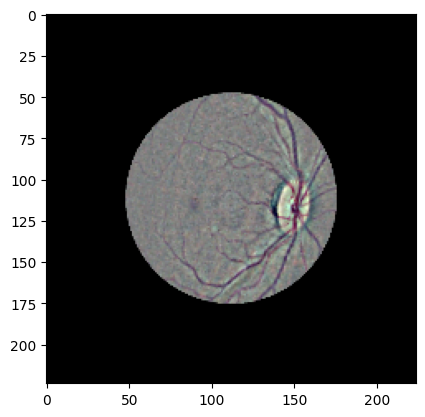

In [ ]:
plt.imshow(next(train_generator)[0][0])

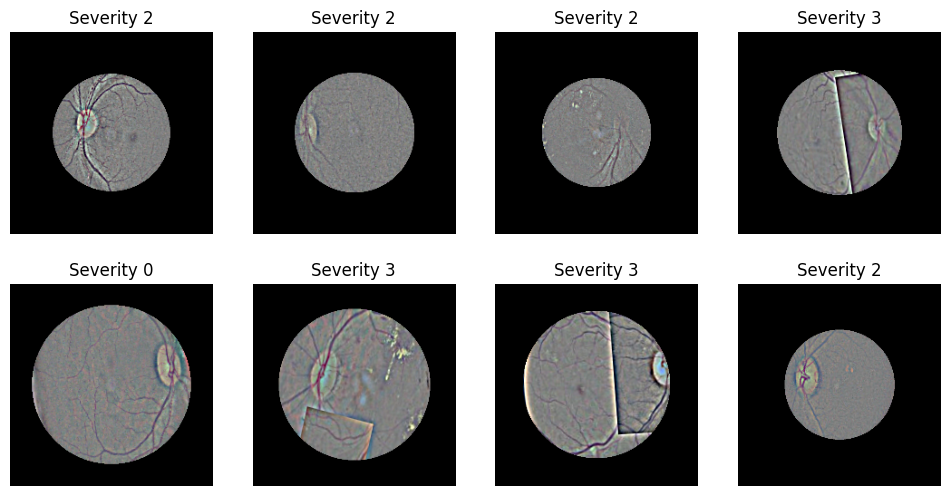

In [ ]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (12, 6))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x)
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

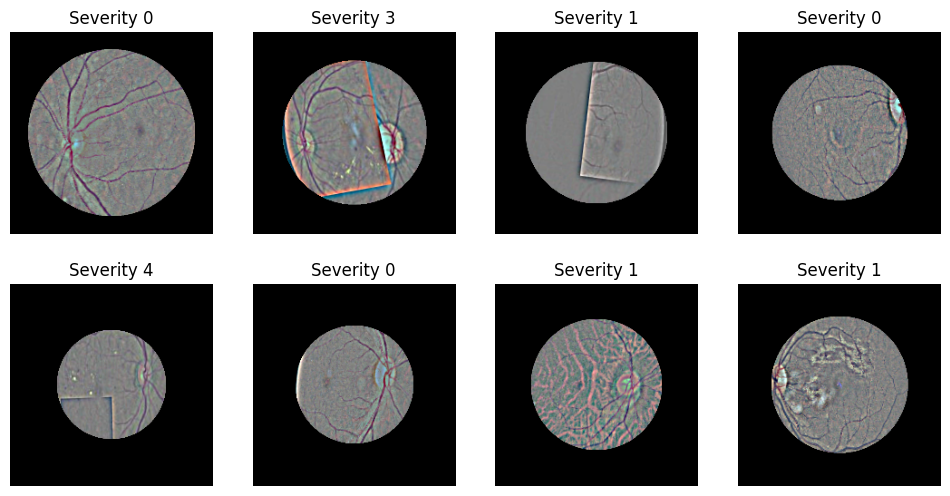

In [ ]:
t_x, t_y = next(train_generator)
fig, m_axs = plt.subplots(2, 4, figsize = (12, 6))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x)
    c_ax.set_title('Severity {}'.format(np.argmax(c_y, -1)))
    c_ax.axis('off')

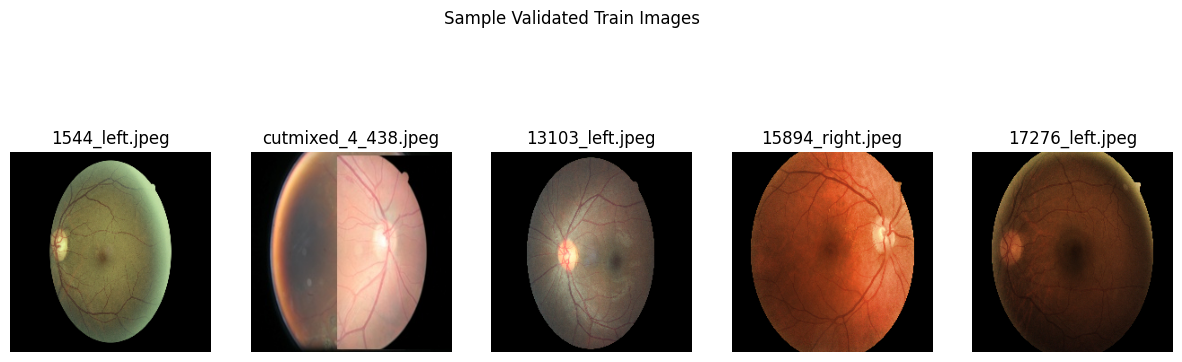

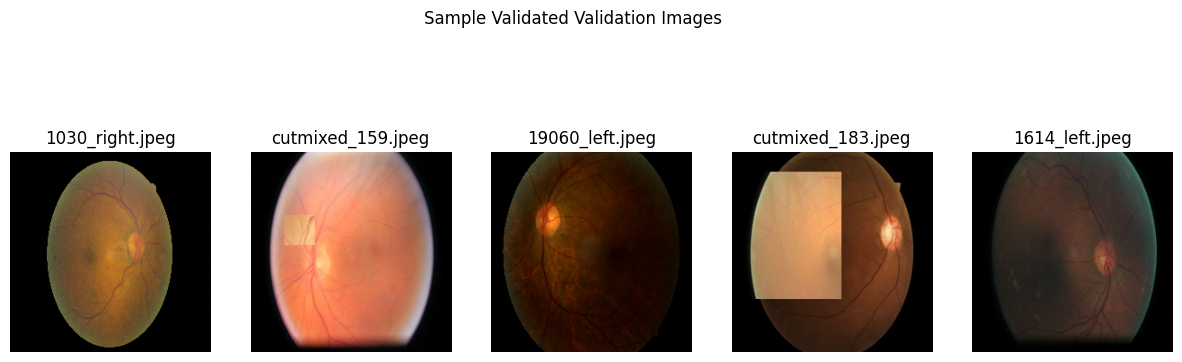

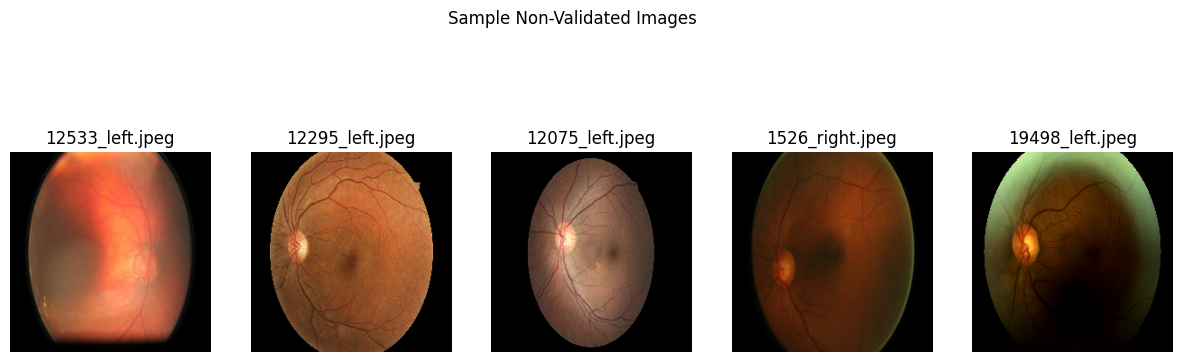

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

image_dir = '/content/drive/MyDrive/train_dr'

validated_train_filenames = train_generator.filenames
validated_val_filenames = val_generator.filenames

all_filenames = os.listdir(image_dir)

non_validated_filenames = [f for f in all_filenames if f not in validated_train_filenames and f not in validated_val_filenames]

def display_sample_images(image_list, title, image_dir, sample_size=5):
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(random.sample(image_list, sample_size)):
        img = load_img(os.path.join(image_dir, filename), target_size=(224, 224))
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(validated_train_filenames, "Sample Validated Train Images", image_dir)
display_sample_images(validated_val_filenames, "Sample Validated Validation Images", image_dir)

display_sample_images(non_validated_filenames, "Sample Non-Validated Images", image_dir)


**Inception Model training**

In [ ]:
import os

checkpoint_dir = '/content/drive/MyDrive/ensemble_model_cut/'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Build model with best parameters
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in inceptionv3.layers:
    layer.trainable = False

x = inceptionv3.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu', kernel_regularizer=l2( 0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu', kernel_regularizer=l2( 0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

NUM_CLASSES = 5
inceptionv3_pred = Dense(NUM_CLASSES, activation='softmax')(x)

best_model_inceptionV3 = Model(inputs=inceptionv3.input, outputs=inceptionv3_pred)


best_model_inceptionV3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Define the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'inception_V3_c.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)
# Callbacks: Early stopping and learning rate reduction
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]

# Train the model
history_x = best_model_inceptionV3.fit(train_generator, validation_data=val_generator, epochs=100, batch_size=16, callbacks=callbacks)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2026s 19s/step - accuracy: 0.3072 - loss: 22.0995 - val_accuracy: 0.3512 - val_loss: 20.5921 - learning_rate: 1.0000e-04
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 437s 4s/step - accuracy: 0.3990 - loss: 20.4804 - val_accuracy: 0.4112 - val_loss: 19.4792 - learning_rate: 1.0000e-04
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.4456 - loss: 19.2732 - val_accuracy: 0.3837 - val_loss: 18.6251 - learning_rate: 1.0000e-04
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 483s 5s/step - accuracy: 0.4690 - loss: 18.2420 - val_accuracy: 0.3975 - val_loss: 17.6024 - learning_rate: 1.0000e-04
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 504s 5s/step - accuracy: 0.4913 - loss: 17.2161 - val_accuracy: 0.4062 - val_loss: 16.7835 - learning_rate: 1.0000e-04
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.4840 - loss: 16.3465 - val_accuracy: 0.4050 - val_loss: 15.9514 - learning_rate: 1.0000e-04
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/s

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c.keras')

# Set a new learning rate for the optimizer
new_learning_rate =1.0000e-04   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'inception_V3_c.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]


# Continue training for more epochs with the adjusted learning rate
history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=60,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 1256s 12s/step - accuracy: 0.5356 - loss: 7.3495 - val_accuracy: 0.4900 - val_loss: 6.6816 - learning_rate: 1.0000e-04
Epoch 2/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.5490 - loss: 6.3229 - val_accuracy: 0.4888 - val_loss: 6.0415 - learning_rate: 1.0000e-04
Epoch 3/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 493s 5s/step - accuracy: 0.5524 - loss: 5.8390 - val_accuracy: 0.4737 - val_loss: 5.8485 - learning_rate: 1.0000e-04
Epoch 4/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 450s 4s/step - accuracy: 0.5573 - loss: 5.5409 - val_accuracy: 0.4475 - val_loss: 5.5882 - learning_rate: 1.0000e-04
Epoch 5/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 498s 5s/step - accuracy: 0.5962 - loss: 5.2286 - val_accuracy: 0.4487 - val_loss: 5.5263 - learning_rate: 1.0000e-04
Epoch 6/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 434s 4s/step - accuracy: 0.5798 - loss: 5.0267 - val_accuracy: 0.4363 - val_loss: 5.1917 - learning_rate: 1.0000e-04
Epoch 7/60
100/100 ━━━━━━━━━━━━━━━━━━━━ 441s 4s/step - accuracy: 0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c.keras')

# Set a new learning rate for the optimizer
new_learning_rate =1.0000e-04   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'inception_V3_c2.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]

history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=75,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/75


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 2301s 21s/step - accuracy: 0.5462 - loss: 4.7165 - val_accuracy: 0.4725 - val_loss: 4.6937 - learning_rate: 1.0000e-04
Epoch 2/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.5550 - loss: 4.3971 - val_accuracy: 0.4812 - val_loss: 4.4343 - learning_rate: 1.0000e-04
Epoch 3/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 500s 5s/step - accuracy: 0.5483 - loss: 4.1903 - val_accuracy: 0.4688 - val_loss: 4.3909 - learning_rate: 1.0000e-04
Epoch 4/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 496s 5s/step - accuracy: 0.5935 - loss: 3.9795 - val_accuracy: 0.4737 - val_loss: 4.2124 - learning_rate: 1.0000e-04
Epoch 5/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 504s 5s/step - accuracy: 0.5772 - loss: 3.8614 - val_accuracy: 0.4675 - val_loss: 4.0550 - learning_rate: 1.0000e-04
Epoch 6/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.5859 - loss: 3.7386 - val_accuracy: 0.4437 - val_loss: 3.9668 - learning_rate: 1.0000e-04
Epoch 7/75
100/100 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c2.keras')

# Set a new learning rate for the optimizer
new_learning_rate =2.0000e-05   # Set the new learning rate

# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'inception_V3_c3.keras'),
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)


callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6),
    checkpoint_callback
]

history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=16,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/16


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 3933s 37s/step - accuracy: 0.6662 - loss: 1.4657 - val_accuracy: 0.5425 - val_loss: 1.6734 - learning_rate: 2.0000e-05
Epoch 2/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 493s 4s/step - accuracy: 0.6757 - loss: 1.3913 - val_accuracy: 0.5238 - val_loss: 1.6317 - learning_rate: 2.0000e-05
Epoch 3/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.6845 - loss: 1.3187 - val_accuracy: 0.5175 - val_loss: 1.6877 - learning_rate: 2.0000e-05
Epoch 4/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.6568 - loss: 1.3560 - val_accuracy: 0.5238 - val_loss: 1.6383 - learning_rate: 2.0000e-05
Epoch 5/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 476s 5s/step - accuracy: 0.6837 - loss: 1.2962 - val_accuracy: 0.5638 - val_loss: 1.5554 - learning_rate: 2.0000e-05
Epoch 6/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.6440 - loss: 1.3328 - val_accuracy: 0.5288 - val_loss: 1.6456 - learning_rate: 2.0000e-05
Epoch 7/16
100/100 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.

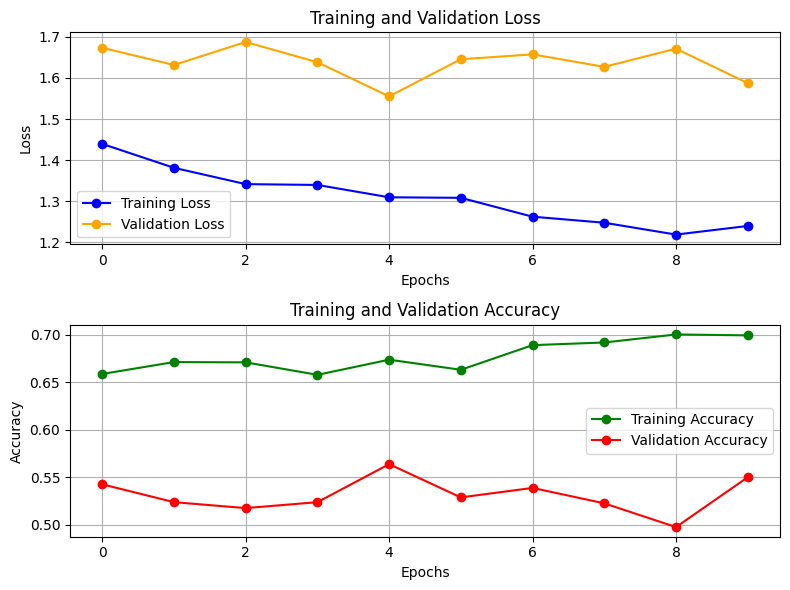

In [ ]:
import matplotlib.pyplot as plt


# Create subplots for loss and accuracy
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Plot training and validation loss
axes[0].plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
axes[0].plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].grid(True)
axes[0].legend()

# Plot training and validation accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', color='green', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
val_loss, val_accuracy = inceptionV3_model.evaluate(val_generator, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.5433 - loss: 1.6150
Validation Accuracy: 0.5487499833106995
Validation Loss: 1.5843592882156372


inceptionV3 further training

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c3.keras')

# # Unfreeze some layers for further fine-tuning
# for layer in inceptionV3_model.layers[-30:]:
#     layer.trainable = True

# Set a new learning rate for the optimizer
new_learning_rate = 4.0000e-06
# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/ensemble_model_cut/inception_V3_c4.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6),
    checkpoint_callback
]

# Continue training
history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 660s 6s/step - accuracy: 0.6603 - loss: 1.3117 - val_accuracy: 0.5775 - val_loss: 1.5405 - learning_rate: 4.0000e-06
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.6538 - loss: 1.3105 - val_accuracy: 0.5950 - val_loss: 1.4754 - learning_rate: 4.0000e-06
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.6668 - loss: 1.3043 - val_accuracy: 0.5987 - val_loss: 1.4884 - learning_rate: 4.0000e-06
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 483s 4s/step - accuracy: 0.6696 - loss: 1.3013 - val_accuracy: 0.5638 - val_loss: 1.5411 - learning_rate: 4.0000e-06
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.6810 - loss: 1.2919 - val_accuracy: 0.5512 - val_loss: 1.5202 - learning_rate: 2.0000e-06
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 415s 4s/step - accuracy: 0.6858 - loss: 1.3009 - val_accuracy: 0.5738 - val_loss: 1.5111 - learning_rate: 2.0000e-06
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step - acc

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c4.keras')

# # Unfreeze some layers for further fine-tuning
# for layer in inceptionV3_model.layers[-30:]:
#     layer.trainable = True

# Set a new learning rate for the optimizer
new_learning_rate = 1e-5
# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/ensemble_model_cut/inception_V3_c5.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    checkpoint_callback
]

# Continue training
history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 520s 5s/step - accuracy: 0.6747 - loss: 1.2780 - val_accuracy: 0.5750 - val_loss: 1.4773 - learning_rate: 1.0000e-05
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 494s 5s/step - accuracy: 0.6825 - loss: 1.2455 - val_accuracy: 0.5512 - val_loss: 1.4941 - learning_rate: 1.0000e-05
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 431s 4s/step - accuracy: 0.6766 - loss: 1.2786 - val_accuracy: 0.5587 - val_loss: 1.5305 - learning_rate: 1.0000e-05
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 491s 5s/step - accuracy: 0.6761 - loss: 1.2552 - val_accuracy: 0.5437 - val_loss: 1.5577 - learning_rate: 1.0000e-05
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 435s 4s/step - accuracy: 0.6932 - loss: 1.2123 - val_accuracy: 0.5863 - val_loss: 1.5227 - learning_rate: 5.0000e-06
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.6949 - loss: 1.2504 - val_accuracy: 0.5625 - val_loss: 1.5309 - learning_rate: 5.0000e-06
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 497s 5s/step - acc

Choosen

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Load the saved model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c5.keras')

# # Unfreeze some layers for further fine-tuning
# for layer in inceptionV3_model.layers[-30:]:
#     layer.trainable = True

# Set a new learning rate for the optimizer
new_learning_rate = 5.0000e-06
# Re-compile the model with the new learning rate
optimizer = Adam(learning_rate=new_learning_rate)
inceptionV3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/ensemble_model_cut/inception_V3_c6.keras',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6),
    checkpoint_callback
]

# Continue training
history = inceptionV3_model.fit(
    train_generator, validation_data=val_generator,
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 547s 5s/step - accuracy: 0.6819 - loss: 1.2673 - val_accuracy: 0.5713 - val_loss: 1.4954 - learning_rate: 5.0000e-06
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.6671 - loss: 1.2686 - val_accuracy: 0.5688 - val_loss: 1.5069 - learning_rate: 5.0000e-06
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 462s 4s/step - accuracy: 0.6822 - loss: 1.2428 - val_accuracy: 0.5600 - val_loss: 1.5426 - learning_rate: 5.0000e-06
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 479s 4s/step - accuracy: 0.6753 - loss: 1.2532 - val_accuracy: 0.5650 - val_loss: 1.5076 - learning_rate: 5.0000e-06
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 444s 4s/step - accuracy: 0.7042 - loss: 1.2204 - val_accuracy: 0.5475 - val_loss: 1.5470 - learning_rate: 5.0000e-06
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6758 - loss: 1.2861

KeyboardInterrupt: 

In [ ]:
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c5.keras')

In [ ]:
val_loss, val_accuracy = inceptionV3_model.evaluate(val_generator, steps=len(val_generator))
print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 97s 4s/step - accuracy: 0.5910 - loss: 1.4536
Validation Accuracy: 0.5824999809265137
Validation Loss: 1.464342474937439


Main

In [ ]:
from tensorflow.keras.models import load_model
inceptionV3_model = load_model('/content/drive/MyDrive/ensemble_model_cut/inception_V3_c6.keras')

In [ ]:
val_loss, val_accuracy = inceptionV3_model.evaluate(val_generator, steps=len(val_generator))

print("Validation Accuracy:", val_accuracy)
print("Validation Loss:", val_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.5724 - loss: 1.5294
Validation Accuracy: 0.5899999737739563
Validation Loss: 1.516970157623291


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

# # # Load the saved model
# model_save_path = '/content/drive/MyDrive/ensemble_model_cut/inception_V3_c6.keras'
# inception_model = load_model(model_save_path)

batch_size = 16
all_predictions = []

true_Y_labels = []

for i in range(len(val_generator)):
    x_batch, y_batch = next(val_generator)
    batch_predictions = inceptionV3_model.predict(x_batch)
    all_predictions.append(batch_predictions)
    true_Y_labels.append(y_batch)
pred_Y = np.concatenate(all_predictions)
true_Y = np.concatenate(true_Y_labels)

pred_Y_labels = np.argmax(pred_Y, axis=1)
true_Y_labels = np.argmax(true_Y, axis=1)

report = classification_report(true_Y_labels, pred_Y_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])

print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
              precision    recall  f1-score   suppor

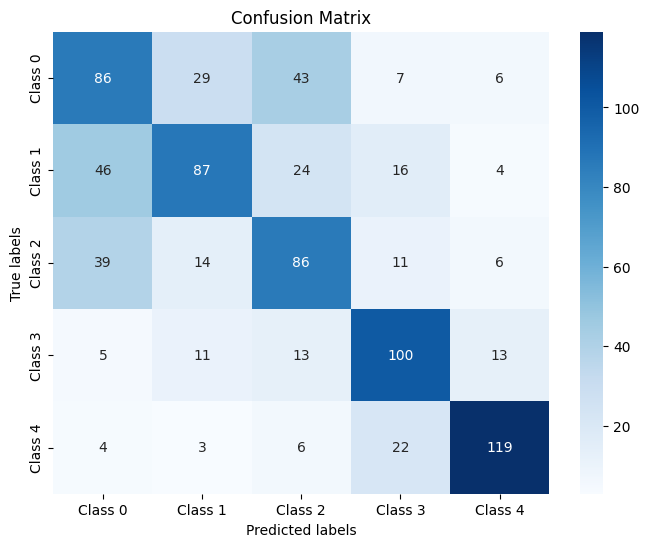

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_Y_labels, pred_Y_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()